In [1]:
import pandas as pd
import folium
import numpy as np
import seaborn as sns
import scipy
from scipy import stats
import matplotlib.pyplot as plt


In [2]:
# Load your CSV data
movement_data = pd.read_csv("../data/movements.csv", parse_dates=["datetime"])  # Replace with your file path
restaurant_data = pd.read_csv("../data/restaurants.csv")  # Replace with your file path

# Clean Data

In [3]:
movement_data.columns = movement_data.columns.str.lower()
restaurant_data.columns = restaurant_data.columns.str.lower()
restaurant_data.rename(columns={'restaurant id': 'restaurant_id'}, inplace=True)

print(movement_data.head())
print(restaurant_data.head())



             datetime    id   longitude   latitude
0 2020-01-01 00:00:00  I000 -122.335167  47.608013
1 2020-01-01 00:01:07  I000 -122.335166  47.608462
2 2020-01-01 00:01:37  I000 -122.335167  47.608432
3 2020-01-01 00:02:35  I000 -122.335166  47.608682
4 2020-01-01 00:04:05  I000 -122.335166  47.608841
  restaurant_id                   name  \
0          R000   Pullman Quick Stop 0   
1          R001   Pullman Quick Stop 1   
2          R002   Pullman Department 2   
3          R003    Pullman Groceries 3   
4          R004  Pullman Supercenter 4   

                                            category   longitude   latitude  
0                                 Convenience Stores -122.435908  47.621564  
1                                 Convenience Stores -122.297377  47.649300  
2                                  Department Stores -122.338057  47.666842  
3  Supermarkets/Other Grocery (Exc Convenience) Strs -122.242926  47.587846  
4                     Warehouse Clubs & Supercenter

In [16]:
print(movement_data.isnull().sum())
print(restaurant_data.isnull().sum())

datetime     0
id           0
longitude    0
latitude     0
timestamp    0
dtype: int64
restaurant_id    0
name             0
category         0
longitude        0
latitude         0
dtype: int64


# Exploratory Data Analysis

## How many people

In [5]:
print(len(movement_data.groupby('id')))

10


## Entries per person

In [6]:
print(movement_data.groupby('id')['datetime'].count().head(10))

id
I000    526301
I001    525745
I002    526180
I003    526591
I004    526238
I005    525837
I006    526184
I007    526330
I008    526492
I009    526170
Name: datetime, dtype: int64


## Graphs of People's Centeral Location

### Haverstine function

In [7]:
# Haversine distance function (Earth radius in kilometers)
def haversine(lon1, lat1, lon2, lat2):
    R = 6371  # Radius of Earth in kilometers
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

### Graphs

In [8]:
centroid = movement_data.groupby('id').agg({'longitude': 'mean', 'latitude': 'mean'}).reset_index()
centroid.columns = ['id', 'centroid_longitude', 'centroid_latitude']

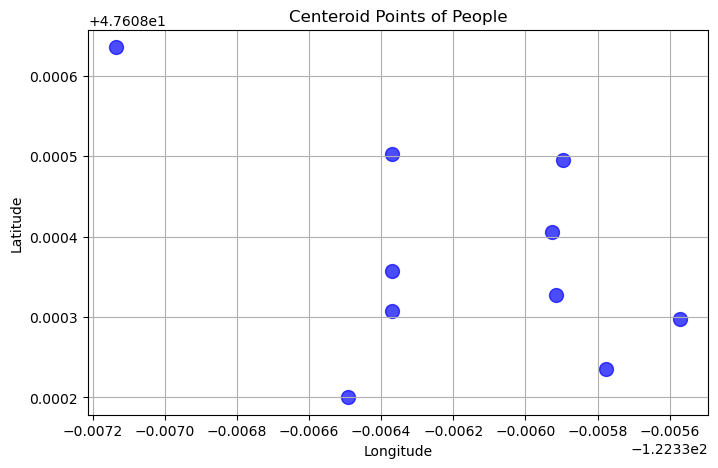

In [9]:
# Create scatter plot
plt.figure(figsize=(8, 5)) 
plt.scatter(centroid['centroid_longitude'], centroid['centroid_latitude'],label='people', color='blue', marker='o', s=100, alpha=0.7)

# Add title and labels
plt.title('Centeroid Points of People')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show grid
plt.grid(True)

# Display the plot
plt.show()

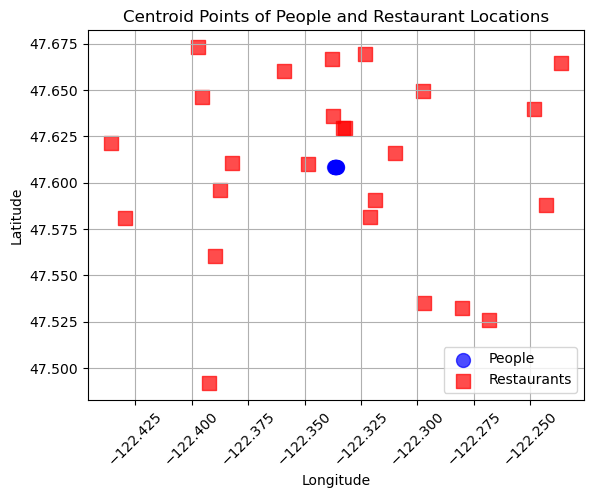

In [26]:
plt.scatter(centroid['centroid_longitude'], centroid['centroid_latitude'],label='People', color='blue', marker='o', s=100, alpha=0.7)
plt.scatter(restaurant_data['longitude'], restaurant_data['latitude'],label='Restaurants', color='red', marker='s', s=100, alpha=0.7)

# Add title and labels
plt.title('Centroid Points of People and Restaurant Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Paths

In [27]:
person1 = movement_data[movement_data['id'] == 'I000']
person1.head()

datetime     526301
id           526301
longitude    526301
latitude     526301
timestamp    526301
dtype: int64


## Average Time Between Measurements

In [11]:
movement_data['timestamp'] = pd.to_datetime(movement_data['datetime'])

# Calculate time differences
time_diffs = movement_data['timestamp'].diff()

# Compute the average time difference
average_time_diff = time_diffs.mean()

print(average_time_diff)

0 days 00:00:59.980084442


## People's Visits to Restaurants

In [ ]:


# Define a function to check if each movement is near a restaurant
def is_near_restaurant(movement, restaurants, threshold_km=0.5):
    # Ensure 'longitude' and 'latitude' exist in movement
    if 'longitude' not in movement or 'latitude' not in movement:
        raise ValueError("Movement must contain 'longitude' and 'latitude' keys.")

    # Iterate over the rows of the restaurants DataFrame
    for index, restaurant in restaurants.iterrows():
        # Calculate the distance using the haversine function
        distance = haversine(movement['longitude'], movement['latitude'],
                             restaurant['longitude'], restaurant['latitude'])
        
        # Check if the distance is within the threshold
        if distance <= threshold_km:
            return True, restaurant['restaurant_id']  # Return True and the restaurant ID

    return False, None  # Return False and None if no nearby restaurant is found


# Apply function to each movement and create a column indicating restaurant visits
# movement_data['restaurant_id'] = movement_data.apply(
#     lambda row: foo(count, row, restaurant_data), axis=1 
# )
for i in range(0, 100):
    person_id = movement_data.head(1)['id']
    print(f'{person_id}: {is_near_restaurant(movement_data.iloc[i], restaurant_data)[1]}')


# Loop through each row in the movement DataFrame
# for index, movement in movement_data.iterrows():
#     is_near, restaurant_id = is_near_restaurant(movement, restaurant_data)
#     print(f"Movement ID: {movement['id']} - Is near a restaurant? {is_near}, Restaurant ID: {restaurant_id}")